In [1]:
import velvetvae as vt

# general packages
import numpy as np
import pandas as pd
import torch
from scipy.sparse import issparse

# velocity packages
import scanpy as sc
import scvelo as scv
import anndata as ann

# plotting packages
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm, trange
from IPython.display import clear_output

# color palette object
from colors import colorpalette as colpal

Global seed set to 0
/camp/home/maizelr/.local/lib/python3.10/site-packages/pytorch_lightning/utilities/warnings.py:53: LightningDeprecationWarning: pytorch_lightning.utilities.warnings.rank_zero_deprecation has been deprecated in v1.6 and will be removed in v1.8. Use the equivalent function from the pytorch_lightning.utilities.rank_zero module instead.
  new_rank_zero_deprecation(
/camp/home/maizelr/.local/lib/python3.10/site-packages/pytorch_lightning/utilities/warnings.py:58: LightningDeprecationWarning: The `pytorch_lightning.loggers.base.rank_zero_experiment` is deprecated in v1.7 and will be removed in v1.9. Please use `pytorch_lightning.loggers.logger.rank_zero_experiment` instead.
  return new_rank_zero_deprecation(*args, **kwargs)


In [2]:
# script specific imports
import os
import scipy as sp

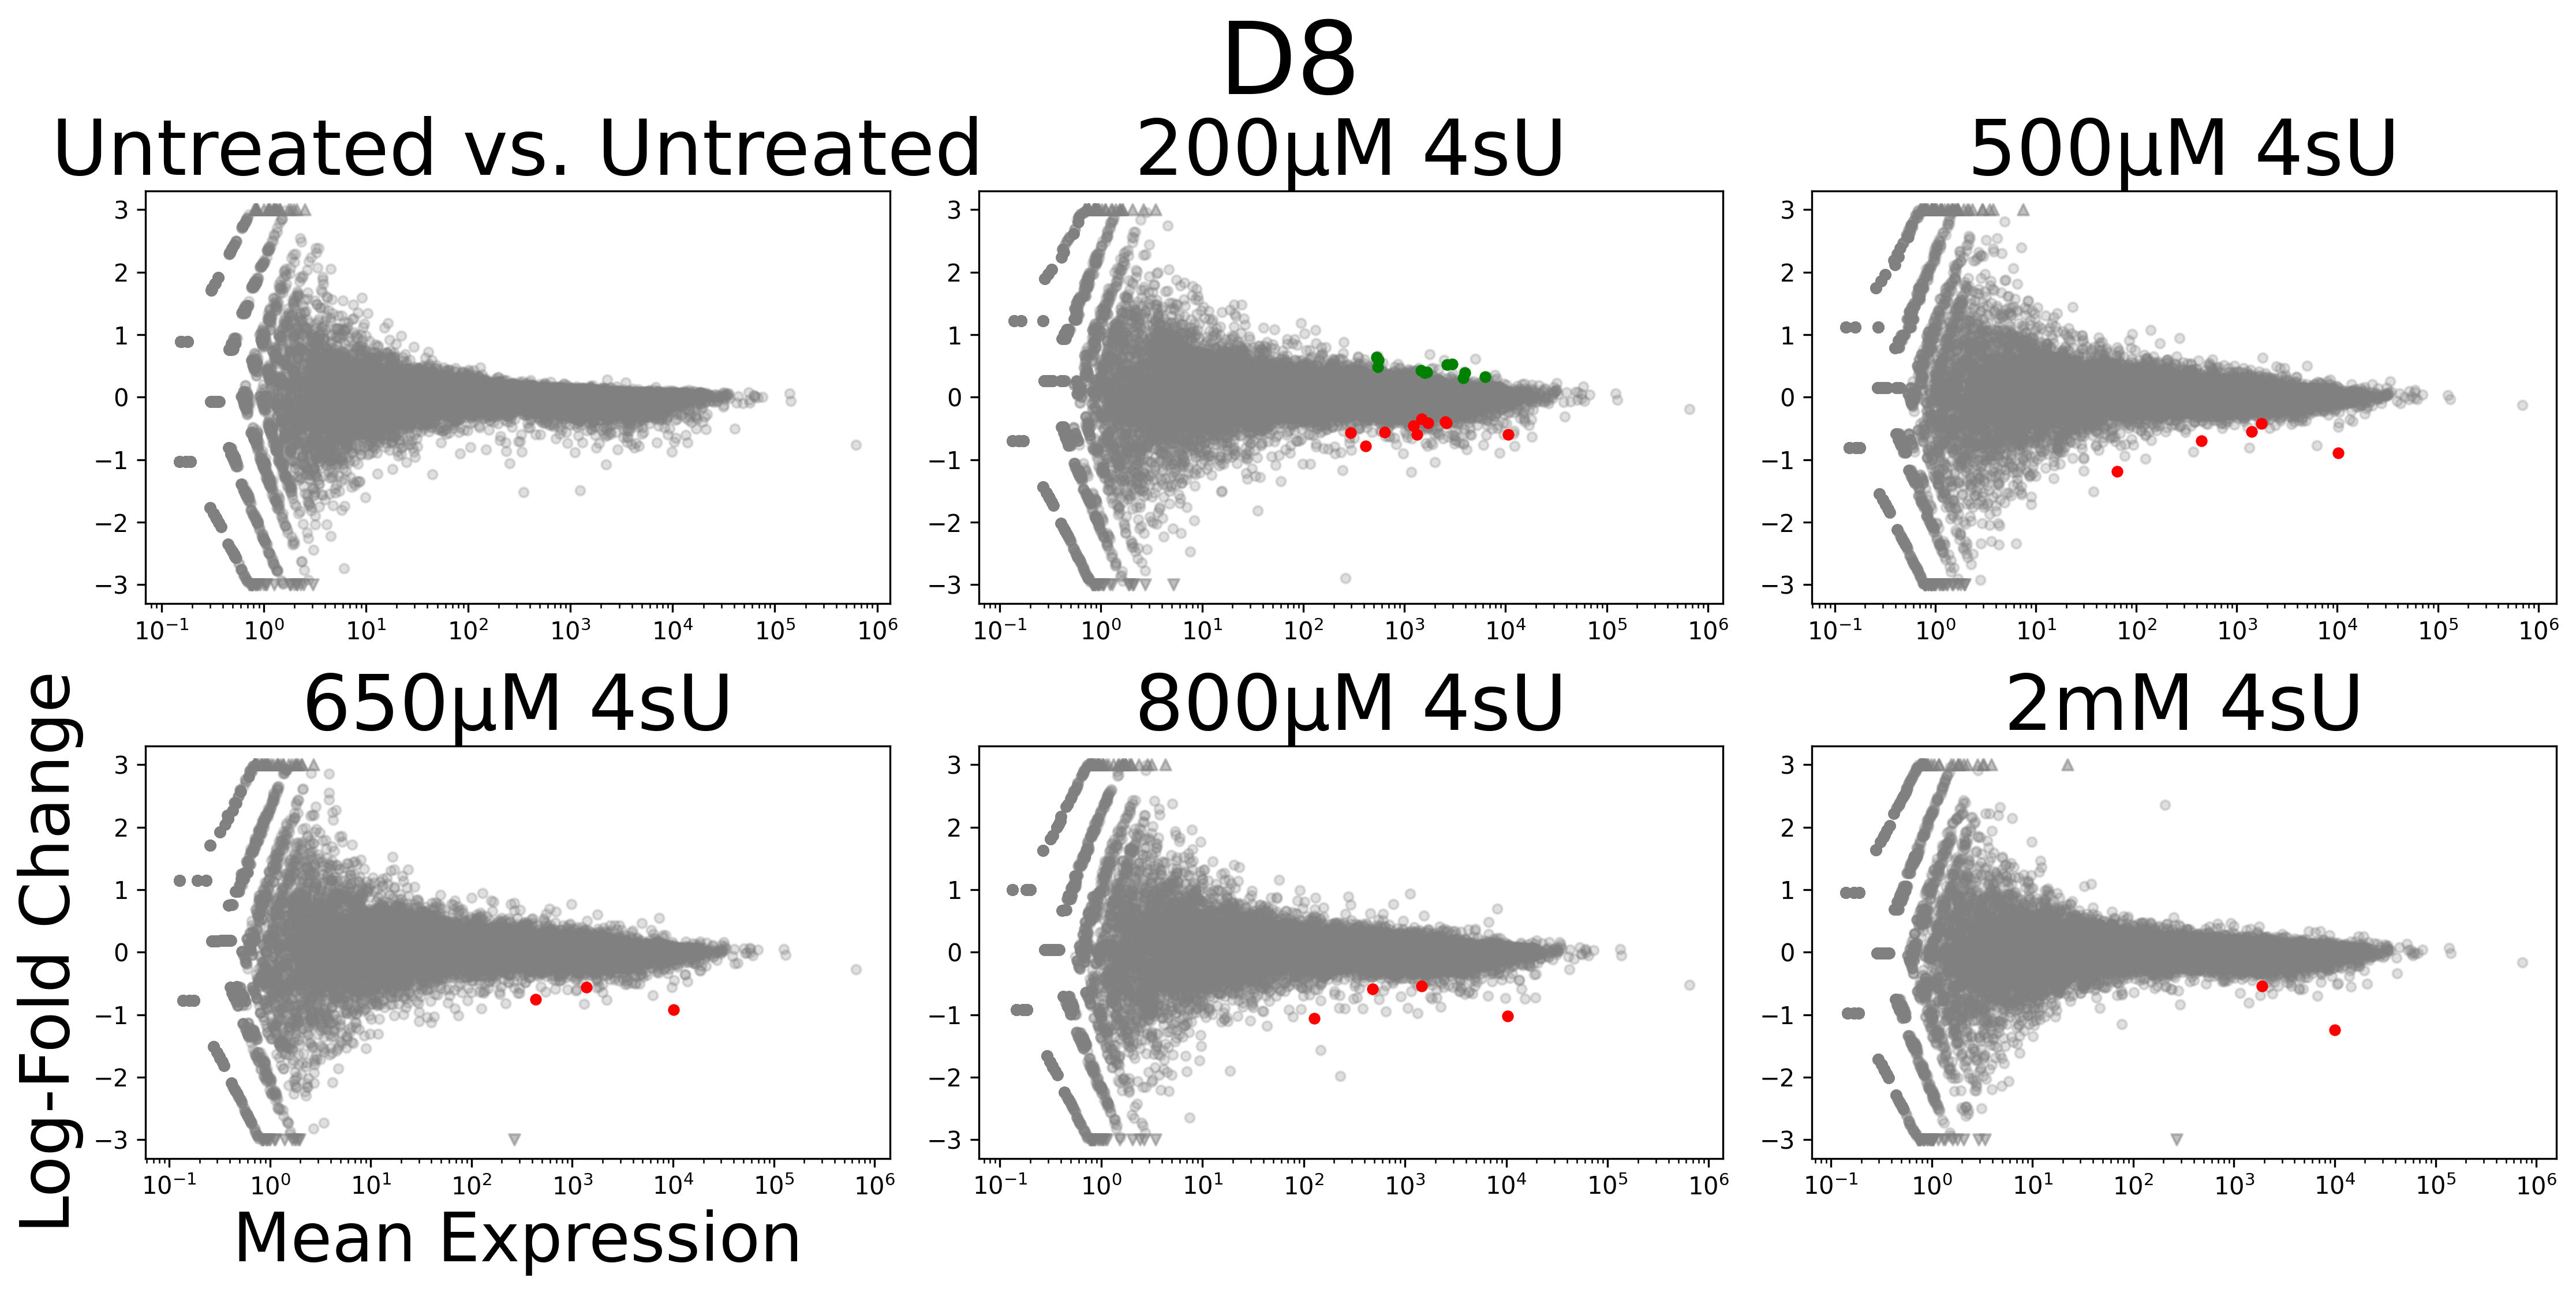

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

data_dict = {'Untreated vs. Untreated': '../input_data/DE_data/D8_untreated.csv',
             '200µM 4sU': '../input_data/DE_data/D8_200uM_1.csv',
             '500µM 4sU': '../input_data/DE_data/D8_500uM_1.csv',
             '650µM 4sU': '../input_data/DE_data/D8_650uM_1.csv',
             '800µM 4sU': '../input_data/DE_data/D8_800uM_1.csv',
             '2mM 4sU': '../input_data/DE_data/D8_2000uM_1.csv'}

fig = plt.figure(figsize=(15,7), dpi=300)
axes = fig.subplots(2,3)
the_axes = axes.flatten()
y_max, y_min = 3, -3

for i, (ax, (title, file)) in enumerate(zip(the_axes, data_dict.items())):
    data = pd.read_csv(file, index_col='Unnamed: 0')
    normal_x, normal_y = [], []
    sigup_x, sigup_y = [], []
    sigdn_x, sigdn_y = [], []
    hidup_x, hidup_y = [], []
    hiddn_x, hiddn_y = [], []
    hsup_x, hsup_y = [], []
    hsdn_x, hsdn_y = [], []

    for index, row in data.iterrows():
        padj = row[-1]
        mean = row[0]
        l2fc = row[1]
        if padj < 0.05:
            if l2fc > 0:
                if l2fc > y_max:
                    hsup_x.append(mean)
                    hsup_y.append(y_max)
                else:
                    sigup_x.append(mean)
                    sigup_y.append(l2fc)
            elif l2fc < 0:
                if l2fc < y_min:
                    hsdn_x.append(mean)
                    hsdn_y.append(y_min)
                else:
                    sigdn_x.append(mean)
                    sigdn_y.append(l2fc)
        elif l2fc > y_max:
            hidup_x.append(mean)
            hidup_y.append(y_max)
        elif l2fc < y_min:
            hiddn_x.append(mean)
            hiddn_y.append(y_min)
        else:
            normal_x.append(mean)
            normal_y.append(l2fc)
    ax.scatter(normal_x,normal_y, color='grey',s=15, alpha=0.25)
    ax.scatter(hidup_x,hidup_y, color='grey',s=20, alpha=.5, marker='^')
    ax.scatter(hiddn_x,hiddn_y, color='grey',s=20, alpha=.5, marker='v')
    ax.scatter(hsup_x,hsup_y, color='green',s=20, alpha=1, marker='^')
    ax.scatter(hsdn_x,hsdn_y, color='red',s=20, alpha=1, marker='v')
    ax.scatter(sigup_x,sigup_y, color='green',s=15, alpha=1, label='Upregulated (P<0.05)')
    ax.scatter(sigdn_x,sigdn_y, color='red',s=15, alpha=1,label='Downregulated (P<0.05)')
    ax.set_xscale('log')
    ax.set_title(f'{title}', fontsize=32)
    if i == 3:
        ax.set_xlabel('Mean Expression', fontsize=28)
        ax.set_ylabel('Log-Fold Change', fontsize=28)
plt.tight_layout()
plt.suptitle(f"D8", fontsize=42, y=1.06)
for fig in plt.get_fignums():
    fig = plt.figure(fig)
    fig.patch.set_facecolor('none')

    for ax in fig.get_axes():
        ax.set_facecolor('white')
plt.savefig('../figures/0.3.0_D8_4sU_RNAseq.png', bbox_inches='tight')
plt.show()


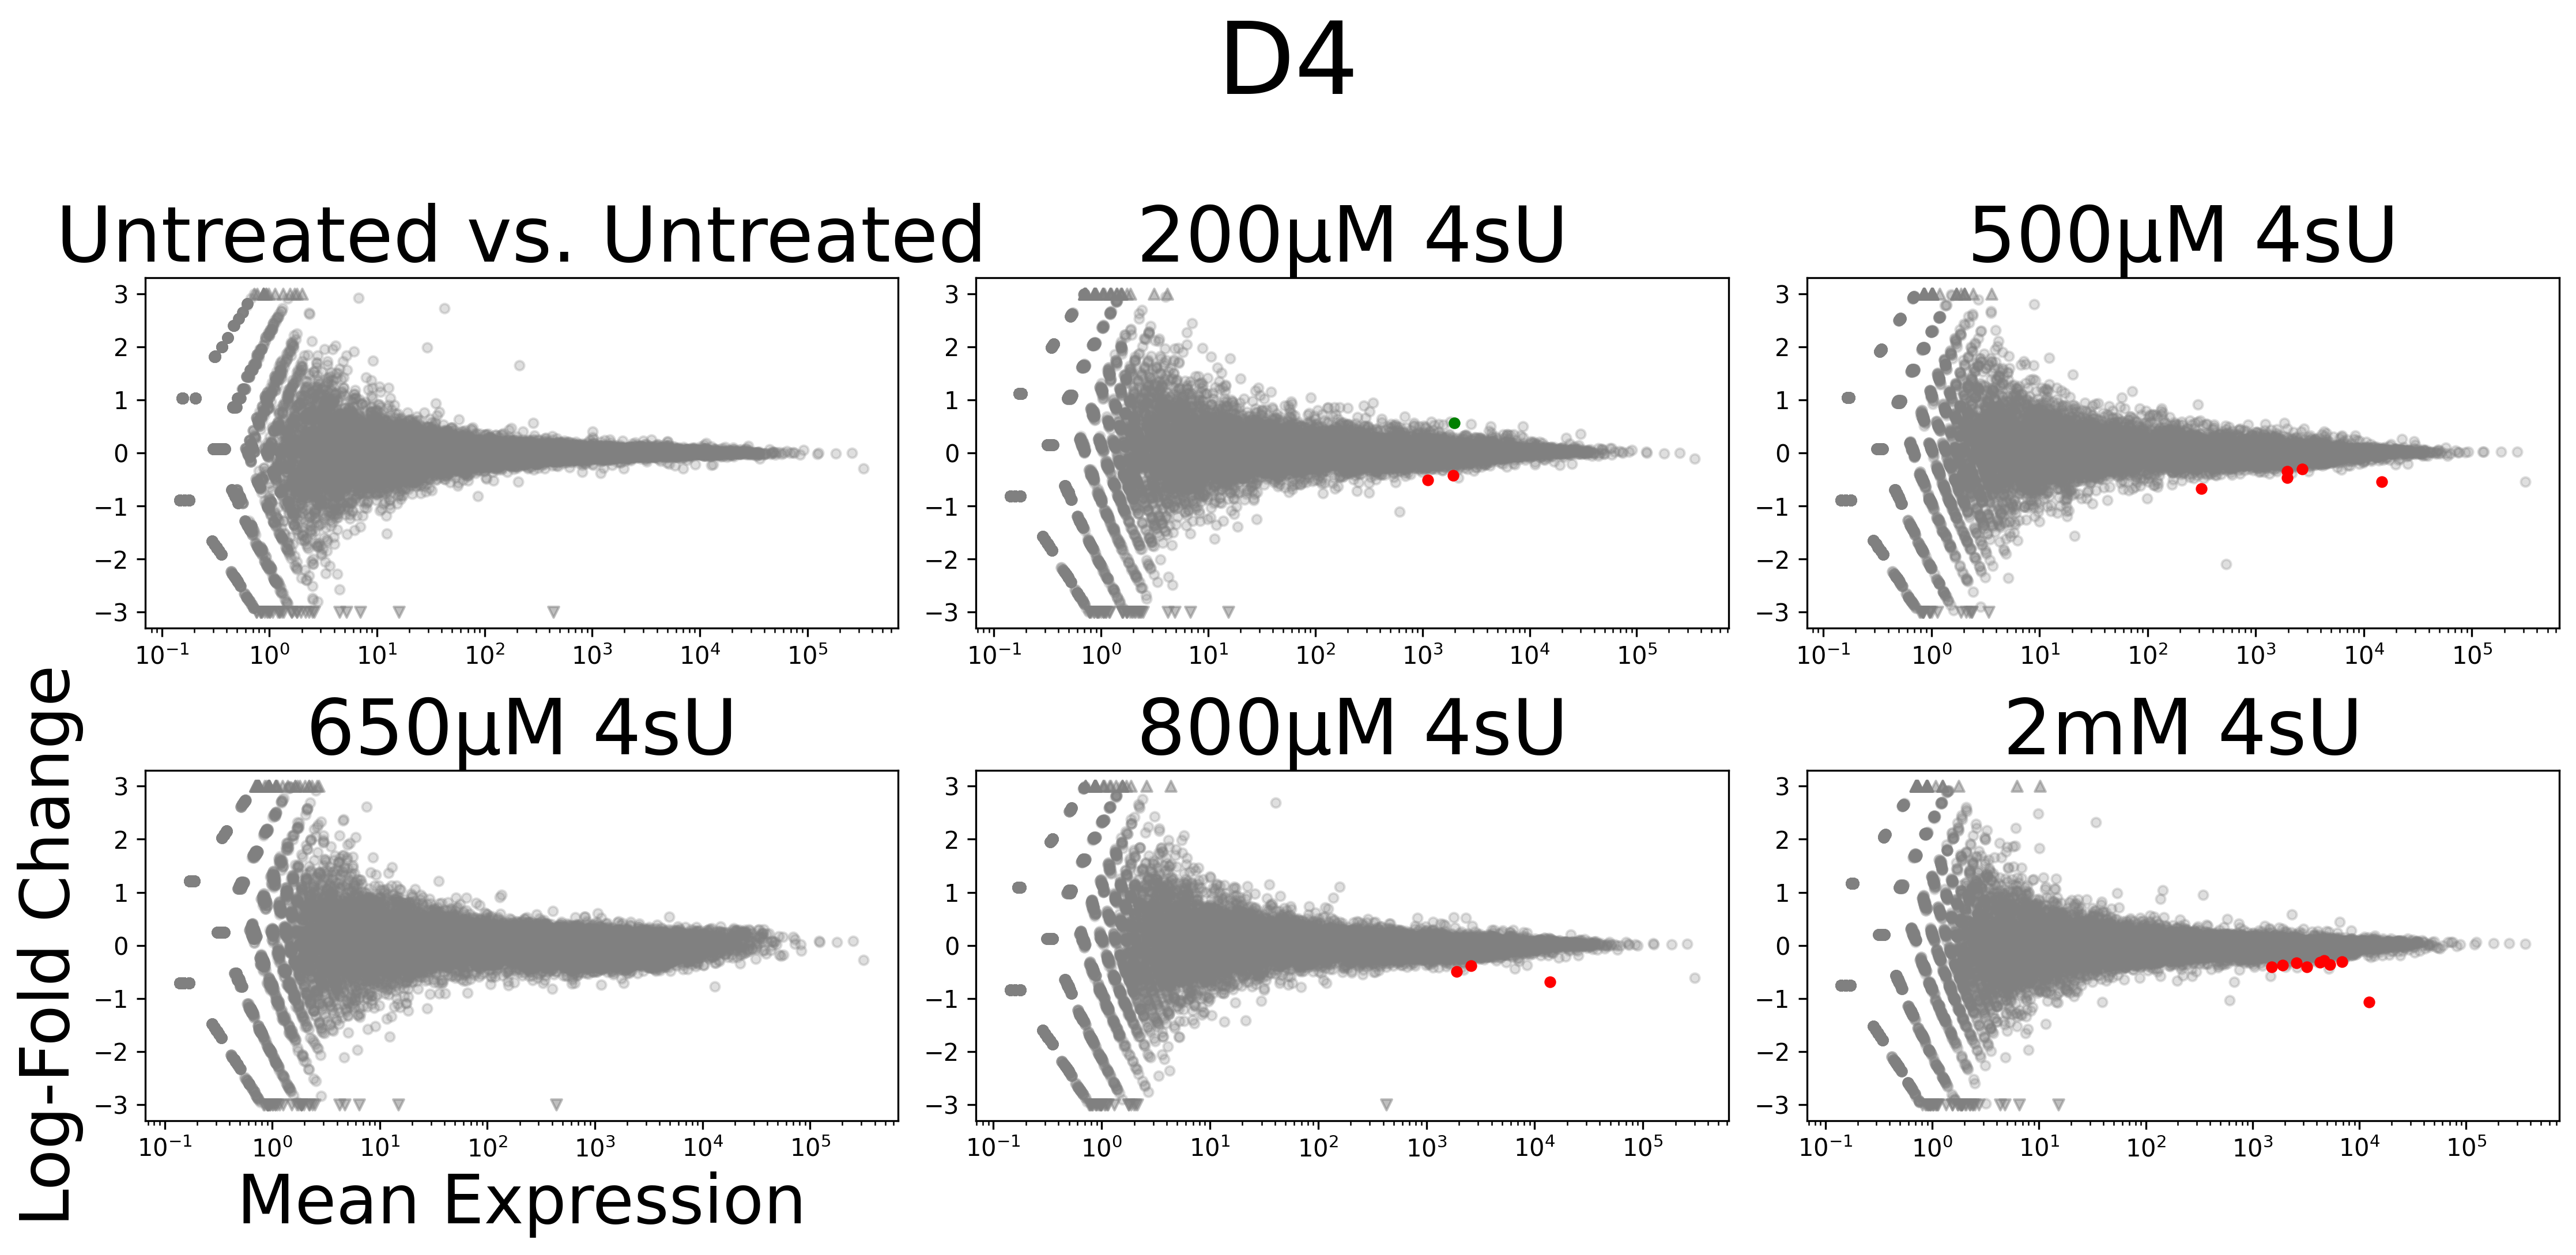

In [22]:
data_dict = {'Untreated vs. Untreated': '../input_data/DE_data/D4_untreated.csv',
             '200µM 4sU': '../input_data/DE_data/D4_200uM_1.csv',
             '500µM 4sU': '../input_data/DE_data/D4_500uM_1.csv',
             '650µM 4sU': '../input_data/DE_data/D4_650uM_1.csv',
             '800µM 4sU': '../input_data/DE_data/D4_800uM_1.csv',
             '2mM 4sU': '../input_data/DE_data/D4_2000uM_1.csv'}

fig = plt.figure(figsize=(15,7), dpi=300)
axes = fig.subplots(2,3)
the_axes = axes.flatten()
y_max, y_min = 3, -3

for i, (ax, (title, file)) in enumerate(zip(the_axes, data_dict.items())):
    data = pd.read_csv(file, index_col='Unnamed: 0')
    normal_x, normal_y = [], []
    sigup_x, sigup_y = [], []
    sigdn_x, sigdn_y = [], []
    hidup_x, hidup_y = [], []
    hiddn_x, hiddn_y = [], []

    hsup_x, hsup_y = [], []
    hsdn_x, hsdn_y = [], []

    for index, row in data.iterrows():
        padj = row[-1]
        mean = row[0]
        l2fc = row[1]
        if padj < 0.05:
            if l2fc > 0:
                if l2fc > y_max:
                    hsup_x.append(mean)
                    hsup_y.append(y_max)
                else:
                    sigup_x.append(mean)
                    sigup_y.append(l2fc)
            elif l2fc < 0:
                if l2fc < y_min:
                    hsdn_x.append(mean)
                    hsdn_y.append(y_min)
                else:
                    sigdn_x.append(mean)
                    sigdn_y.append(l2fc)
        elif l2fc > y_max:
            hidup_x.append(mean)
            hidup_y.append(y_max)
        elif l2fc < y_min:
            hiddn_x.append(mean)
            hiddn_y.append(y_min)
        else:
            normal_x.append(mean)
            normal_y.append(l2fc)
    ax.scatter(normal_x,normal_y, color='grey',s=15, alpha=0.25)
    ax.scatter(hidup_x,hidup_y, color='grey',s=20, alpha=.5, marker='^')
    ax.scatter(hiddn_x,hiddn_y, color='grey',s=20, alpha=.5, marker='v')
    ax.scatter(hsup_x,hsup_y, color='green',s=20, alpha=1, marker='^')
    ax.scatter(hsdn_x,hsdn_y, color='red',s=20, alpha=1, marker='v')
    ax.scatter(sigup_x,sigup_y, color='green',s=15, alpha=1, label='Upregulated (P<0.05)')
    ax.scatter(sigdn_x,sigdn_y, color='red',s=15, alpha=1,label='Downregulated (P<0.05)')
    ax.set_xscale('log')
    ax.set_title(f'{title}', fontsize=32)
    if i == 3:
        ax.set_xlabel('Mean Expression', fontsize=28)
        ax.set_ylabel('Log-Fold Change', fontsize=28)
plt.suptitle(f"D4", fontsize=42, y=1.03)
plt.tight_layout()
for fig in plt.get_fignums():
    fig = plt.figure(fig)
    # Set the figure facecolor to transparent
    fig.patch.set_facecolor('none')

    # Loop over the axes in the figure
    for ax in fig.get_axes():
        # Set the axes facecolor to white
        ax.set_facecolor('white')
        
plt.savefig("../figures/0.3.1_d4_4sU_RNAseq.png", bbox_inches='tight')
plt.show()

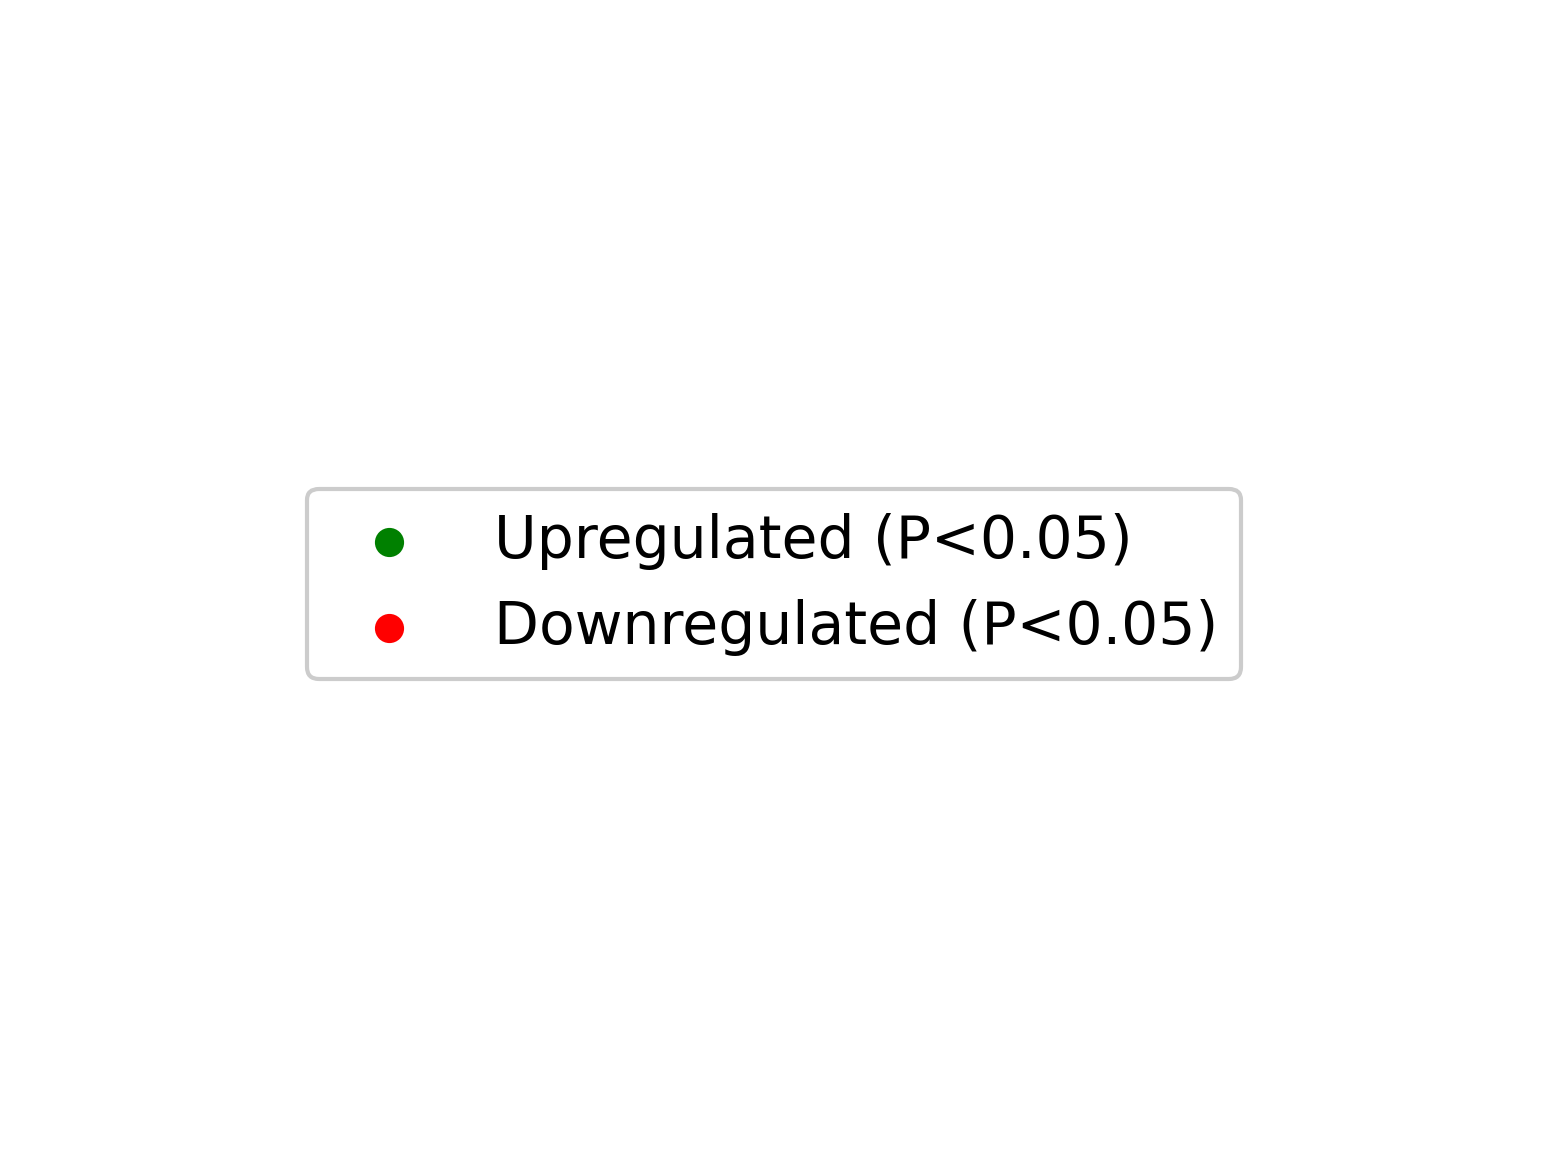

In [30]:
x = [0]
y = [0]

fig, ax = plt.subplots(dpi=300)
ax.scatter(x, y, color='green', label='Upregulated (P<0.05)')
ax.scatter(x, y, color='red', label='Downregulated (P<0.05)')
ax.axis('off')
legend = plt.legend(loc='center', fontsize=14, framealpha=1.0)
for fig in plt.get_fignums():
    fig = plt.figure(fig)
    # Set the figure facecolor to transparent
    fig.patch.set_facecolor('none')

    # Loop over the axes in the figure
    for ax in fig.get_axes():
        # Set the axes facecolor to white
        ax.set_facecolor('white')
        
plt.savefig("../figures/0.3.9_legend.png", bbox_inches='tight')
plt.show()


In [31]:
x = [500]
d4 = {}
d8 = {}
for (day, dic) in zip(['D4','D8'],[d4,d8]):
    for conc in x:    
        path1 = f'../input_data/DE_data/{day}_{conc}uM_1.csv'
        path2 = f'../input_data/DE_data/{day}_{conc}uM_2.csv'
        df1 = pd.read_csv(path1, index_col='Unnamed: 0')
        df2 = pd.read_csv(path2, index_col='Unnamed: 0')
        dic[conc] = [sum(df1.padj<=0.05), sum(df2.padj<=0.05)]

In [32]:
print(d4)
print(d8)

{500: [5, 5]}
{500: [5, 10]}


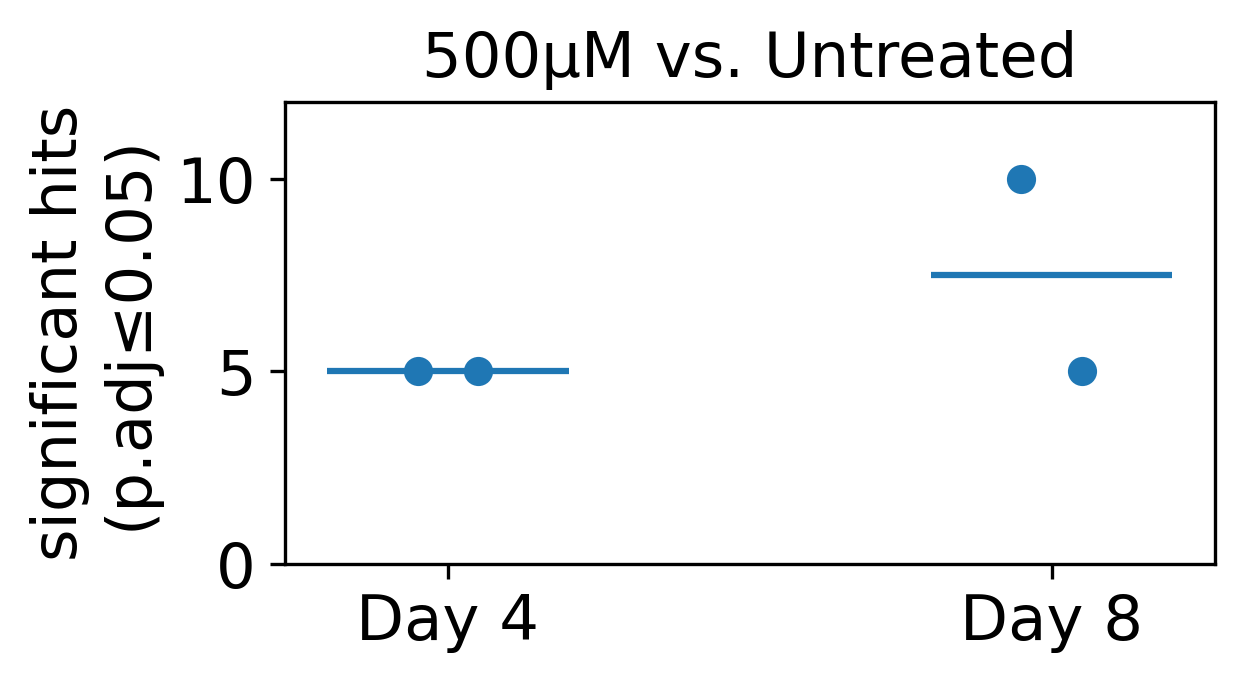

In [38]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# Data
x = np.array([4, 8])  # x values
y1 = np.array([5,5])  # y values of replicate 1
y2 = np.array([5, 10])  # y values of replicate 2

# Calculate mean
y_mean = np.mean([y1, y2], axis=0)  # Mean values

# Create evenly spaced x-values
x_ticks = np.linspace(0, len(x) - 1, len(x))
plt.figure(figsize=(4,2), dpi=300)
# Create the plot
plt.hlines(y_mean, x_ticks - 0.2, x_ticks + 0.2, color='tab:blue')  # Plot the mean horizontal lines
plt.scatter(x_ticks+0.05, y1, c='tab:blue',)  # Plot the replicate 1 dots
plt.scatter(x_ticks-0.05, y2, c='tab:blue',)  # Plot the replicate 2 dots

# Set x-ticks at the evenly spaced x-values
plt.xticks(x_ticks, ['Day 4', 'Day 8'], fontsize=15)
plt.yticks([0,5,10], fontsize=15)
# Set labels and title
plt.xlabel('')
plt.ylabel('significant hits\n(p.adj≤0.05)', fontsize=15)
plt.title('500µM vs. Untreated', fontsize=15)

# Add a legend
plt.ylim(0,12)
# Display the plot

for fig in plt.get_fignums():
    fig = plt.figure(fig)
    # Set the figure facecolor to transparent
    fig.patch.set_facecolor('none')

    # Loop over the axes in the figure
    for ax in fig.get_axes():
        # Set the axes facecolor to white
        ax.set_facecolor('white')

plt.savefig("../figures/0.3.2_4sU_rnaseq_reps.png", bbox_inches='tight')
plt.show()
